In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [86]:
sns.set()

In [87]:
df = pd.read_csv("Classified Data", index_col=0)

In [88]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [89]:
df.tail()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1
999,0.837460,0.961184,0.417006,0.799784,0.934399,0.424762,0.778234,0.907962,1.257190,1.364837,1


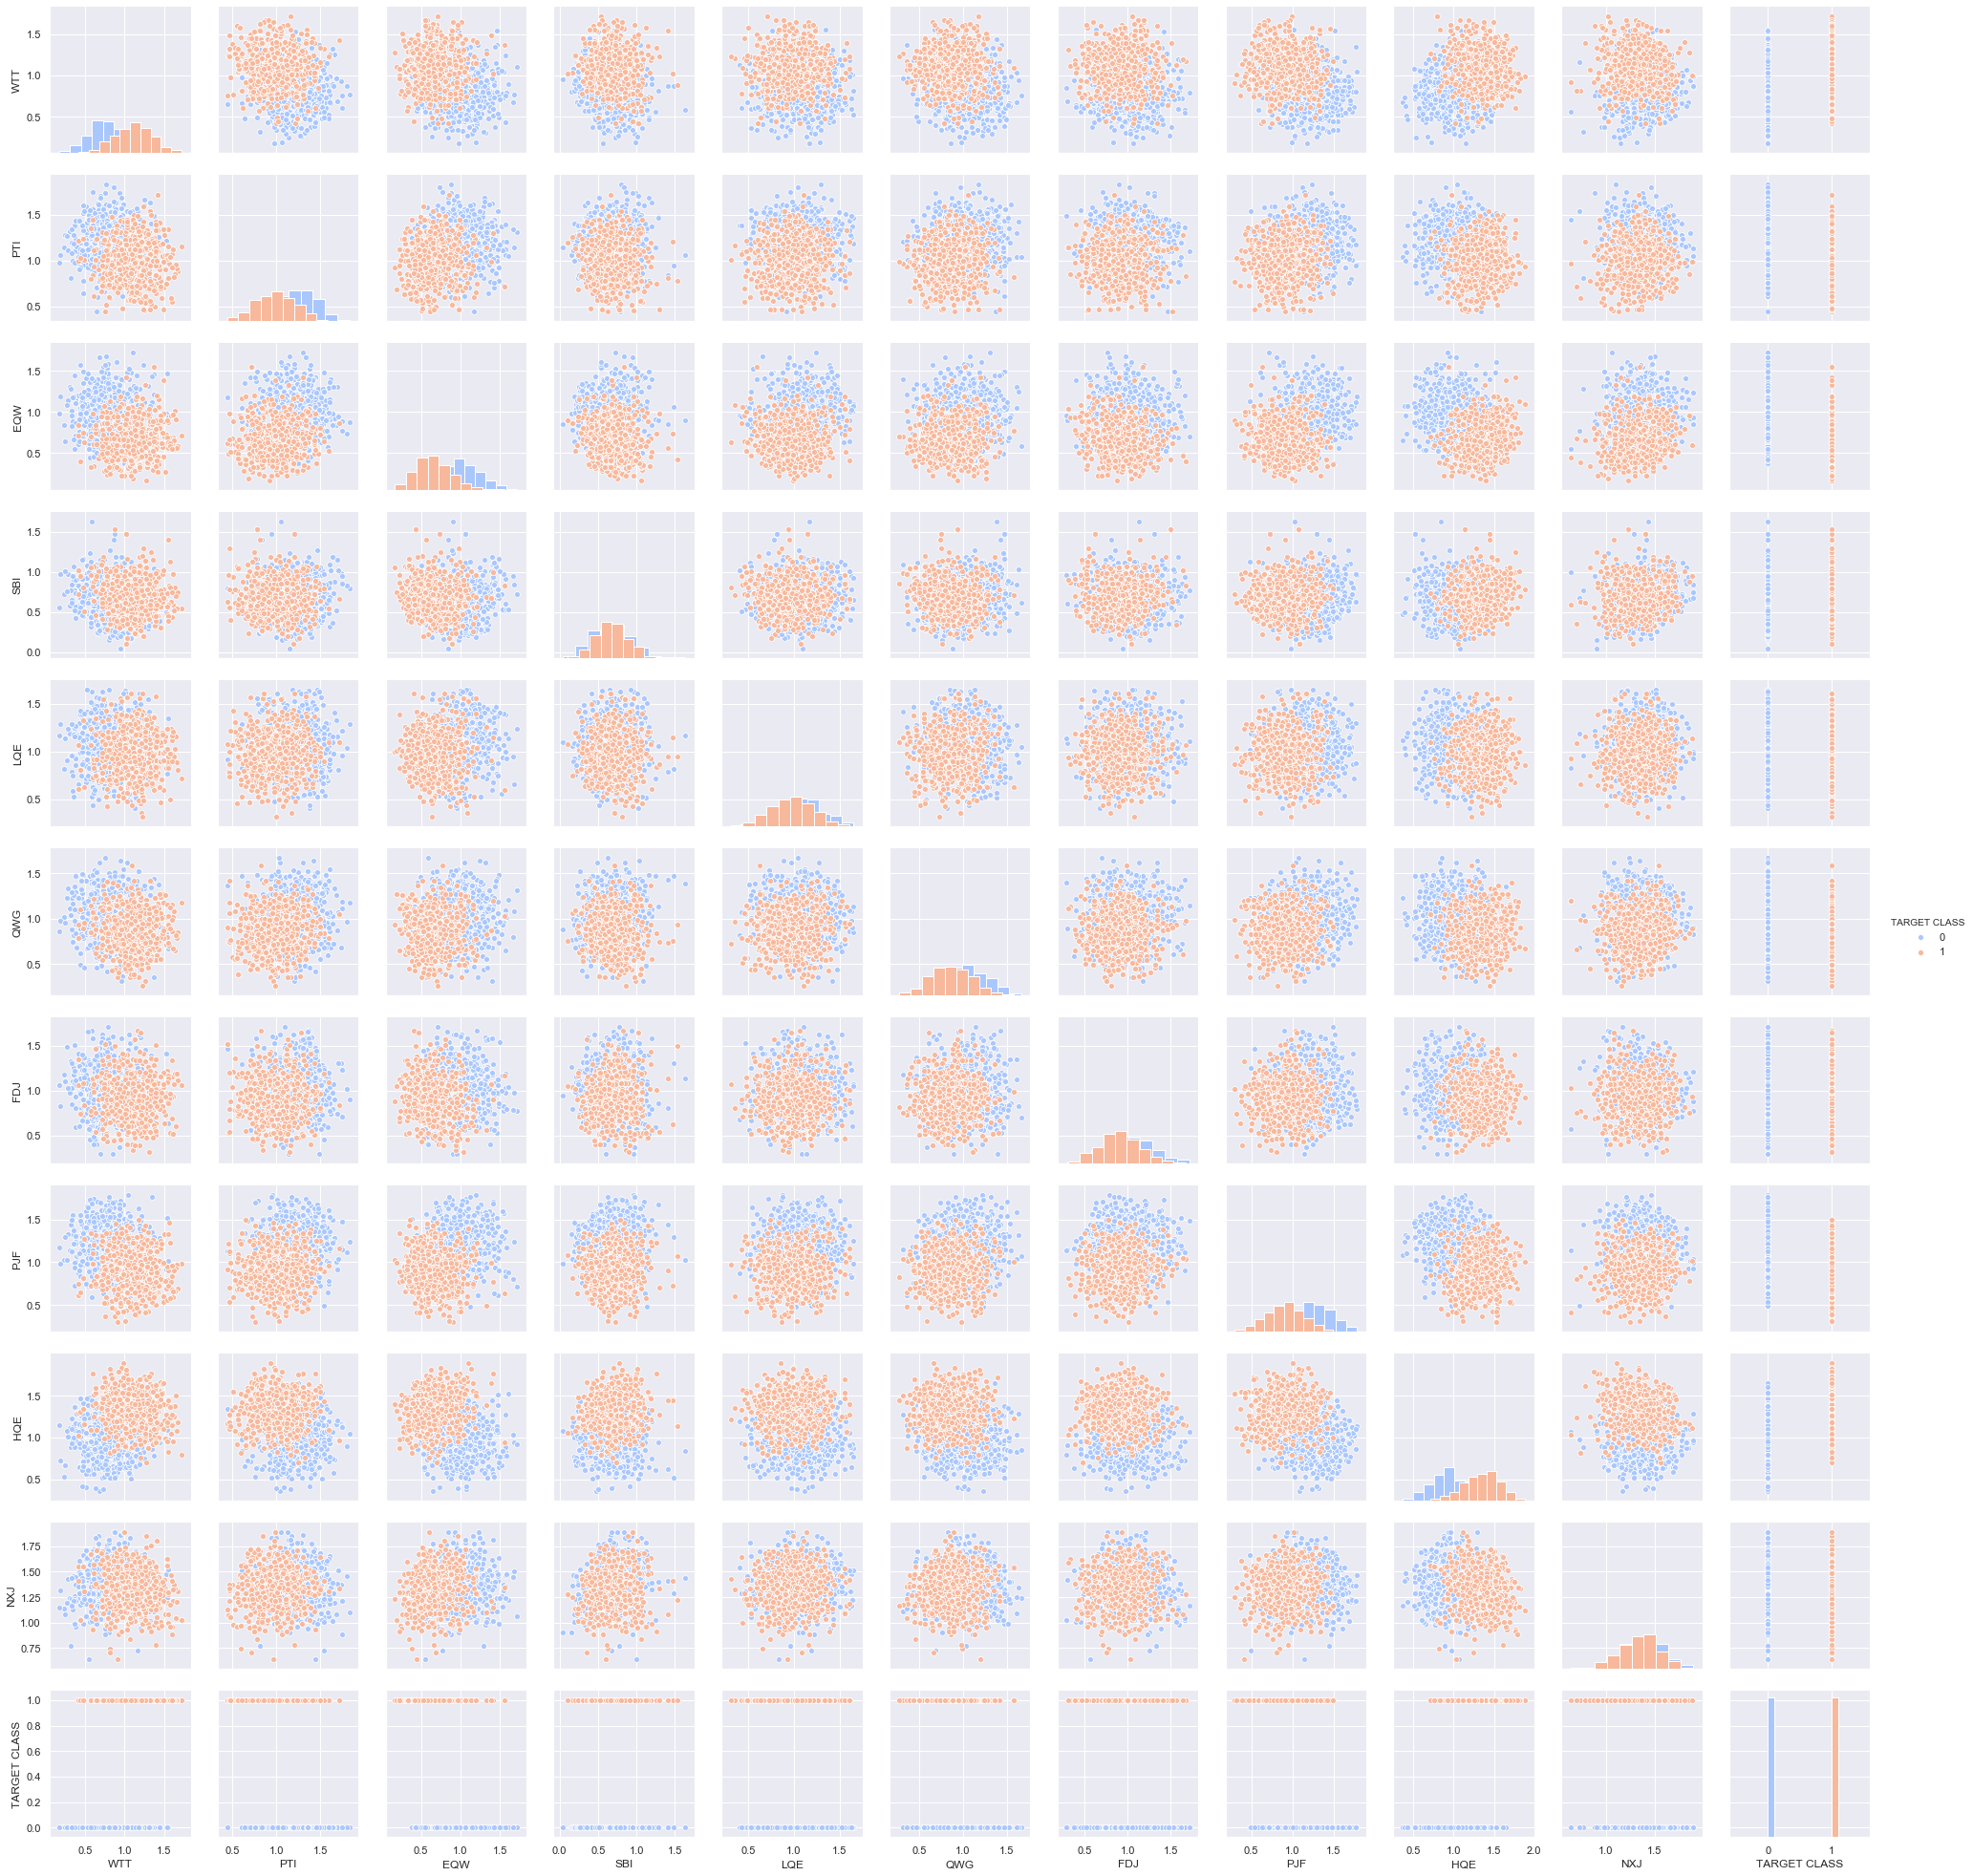

In [103]:
sns.pairplot(df, hue='TARGET CLASS', palette='coolwarm', diag_kind='hist')

In [92]:
X = df.drop('TARGET CLASS', axis=1)

In [93]:
y = df['TARGET CLASS']

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [106]:
from sklearn.preprocessing import StandardScaler

In [107]:
scaler = StandardScaler()

In [108]:
X_train = scaler.fit_transform(X_train)

In [109]:
X_test = scaler.transform(X_test)

In [110]:
from sklearn.neighbors import KNeighborsClassifier

In [111]:
knn = KNeighborsClassifier(n_neighbors=1)

In [112]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [113]:
y_pred = knn.predict(X_test) 

In [114]:
from sklearn.metrics import classification_report, confusion_matrix

In [115]:
print(confusion_matrix(y_test, y_pred))

[[130  21]
 [  6 143]]


In [116]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91       151
           1       0.87      0.96      0.91       149

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [118]:
from sklearn.model_selection import cross_val_score

In [119]:
neighbors = range(1, 50, 2)
cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

Text(0, 0.5, 'Misclassification Error')

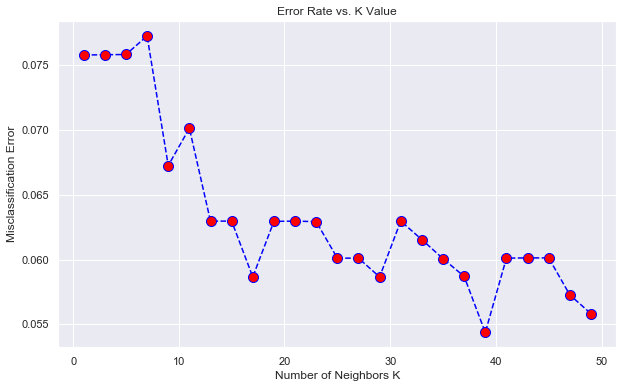

In [120]:
error = [1 - x for x in cv_scores]

plt.figure(figsize=(10,6))
plt.plot(neighbors, error, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')

In [127]:
optimal_k = neighbors[error.index(min(error))]
print(f"The optimal number of neighbors is {optimal_k}")

The optimal number of neighbors is 39


In [131]:
# NOW WITH K=optimal_k
knn = KNeighborsClassifier(n_neighbors=optimal_k)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(f"WITH K={optimal_k}")
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=39


[[135  16]
 [  4 145]]


              precision    recall  f1-score   support

           0       0.97      0.89      0.93       151
           1       0.90      0.97      0.94       149

    accuracy                           0.93       300
   macro avg       0.94      0.93      0.93       300
weighted avg       0.94      0.93      0.93       300



In [19]:
from sklearn.model_selection import GridSearchCV

In [140]:
grid_params = {
    'n_neighbors': range(1, 50, 2),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
}

gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose=1,
    cv=10,
    n_jobs=-1
    )
gs_results = gs.fit(X_train, y_train)

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    1.2s finished


In [141]:
gs_results.best_score_

0.9457142857142857

In [142]:
gs_results.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=39, p=2,
                     weights='uniform')

In [143]:
gs_results.best_params_

{'metric': 'euclidean', 'n_neighbors': 39, 'weights': 'uniform'}

In [144]:
best_knn = gs_results.best_estimator_

In [145]:
y_pred = best_knn.predict(X_test)

In [146]:
print(confusion_matrix(y_test, y_pred))

[[135  16]
 [  4 145]]


In [147]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       151
           1       0.90      0.97      0.94       149

    accuracy                           0.93       300
   macro avg       0.94      0.93      0.93       300
weighted avg       0.94      0.93      0.93       300

